In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    Derivative,
    together
)
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
    HamSext6D
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D
from acchamiltoniansandmatrices.Utils.Plotting import multi_countour_plot

In [5]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

In [6]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)

# accHamiltoniansAndMatrices: Example S-D-S

**M. Arlandoo, J. Frank, T. Mertens**

# Overview

- General assumptions and setup
- Overview of the available Hamiltonians for the drift space
- Exploring the lattice using the simplest drift Hamiltonian (root expanded to first order)
- Exploring the lattice using the drift Hamiltonian to second order 
- Exploring the lattice using the full Hamiltonian
- Explicit numerical examples

Let us apply this to an example, where we consider $A$ and $C$ to be quads and $B$ to be a drift space.
<img src="SDS.png" alt = "test pic" style = "width:500px; height=900px;">

We confine ourselves to the $x-px$ plane and use thin lens approximations for the quadrupoles to not make things more complicated then necessary when the expressions are expanded. We also use the paraxial approximation for the Drift. The relevant Hamiltonians are then given by:
$$H_{S_1}=\frac{x^{3} K_{S_1} L_S}{6} \\
H_{D}=\frac{L p_{x}^{2}}{2} \\
H_{S_2}=x^{3} L_S \left(\frac{K_{S_1}}{6} + \frac{\delta{K_{S_2}}}{6}\right)
$$

In order to minimize the cluttering of equations the following approximations will be used throughout this notebook:
$$\frac{1}{\beta_0^2\gamma_0^2} \rightarrow 0 \\
\beta_0 \rightarrow 1
$$


In [10]:
# Define constant number symbols in sympy - otherwise they are considered variables
LS   = SymbolTrick("L_S")
LD   = SymbolTrick("L_D")
ks2  = SymbolTrick("K_{S_1}")
dks2 = SymbolTrick("\delta{K_{S_2}}")

# inserting replacements to ignore all planes except x-px
rep = list(zip([delta, px, y, py],[0,0,0,0]))
reps = list(zip([delta, px, y, py,beta0*gamma0, beta0],[0,0,0,0,oo,1]))

hams1 = HamSext6D(beta0, gamma0, LS, x, px, y, py, delta, ks2).subs(reps)+LS
hams2 = HamSext6D(beta0,gamma0,LS,x,px,y,py,delta,ks2+dks2).subs(reps)+LS

# Overview Drift Hamiltonians

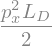

In [11]:
hamd0  = HamDrift6DParaxialSecondOrder(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0)
hamd0

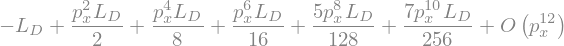

In [12]:
# Series expansion of the Drift Full Hamiltonian
series(HamDrift6D(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0).subs(beta0*gamma0,oo).subs(beta0,1),px,0,12)

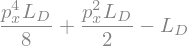

In [13]:
hamd1 = series(HamDrift6D(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0).subs(beta0*gamma0,oo).subs(beta0,1),px,0,6).removeO()
hamd1

In [14]:
hamdf  = HamDrift6D(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0)
hamdf  = hamdf.subs(beta0*gamma0,oo).subs(beta0,1)
hamdf

<span style="color:darkred">Note that the constants do not matter, this is just a shift.</span>

# Simplest Drift Hamiltonian

## Hamiltonians used

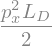

In [15]:
hamd0

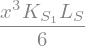

In [16]:
hams1

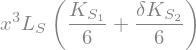

In [17]:
hams2

## BCH Expansions

In [18]:
sdsham1 = Aop.BCH(Bop,1).BCH(Cop,1).ham.subs(A,hams1).subs(B,hamd0).subs(C,hams2).doit()
sdsham2 = Aop.BCH(Bop,2).BCH(Cop,2).ham.subs(A,hams1).subs(B,hamd0).subs(C,hams2).doit()
sdsham3 = Aop.BCH(Bop,3).BCH(Cop,3).ham.subs(A,hams1).subs(B,hamd0).subs(C,hams2).doit()
sdsham4 = Aop.BCH(Bop,4).BCH(Cop,4).ham.subs(A,hams1).subs(B,hamd0).subs(C,hams2).doit()

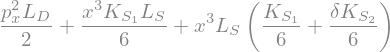

In [19]:
sdsham1

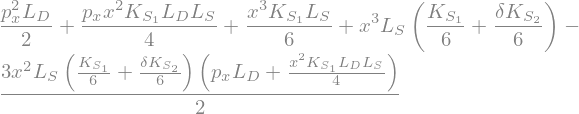

In [20]:
sdsham2

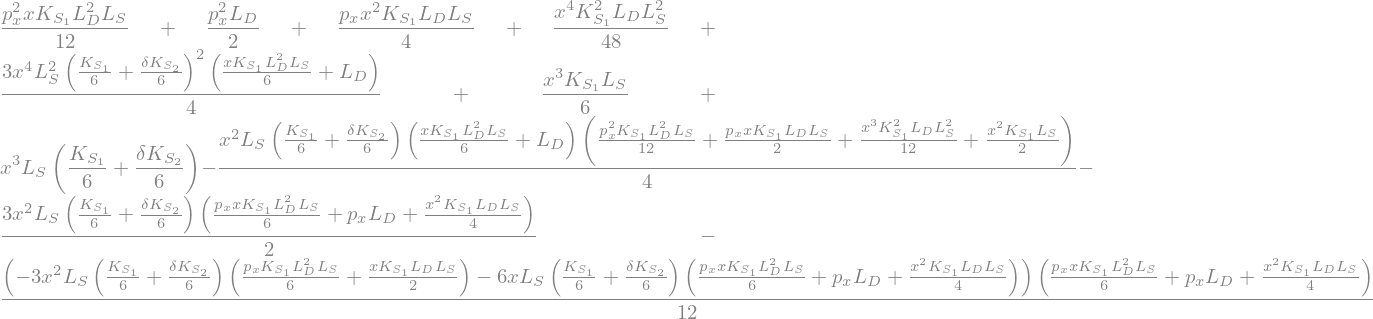

In [21]:
sdsham3

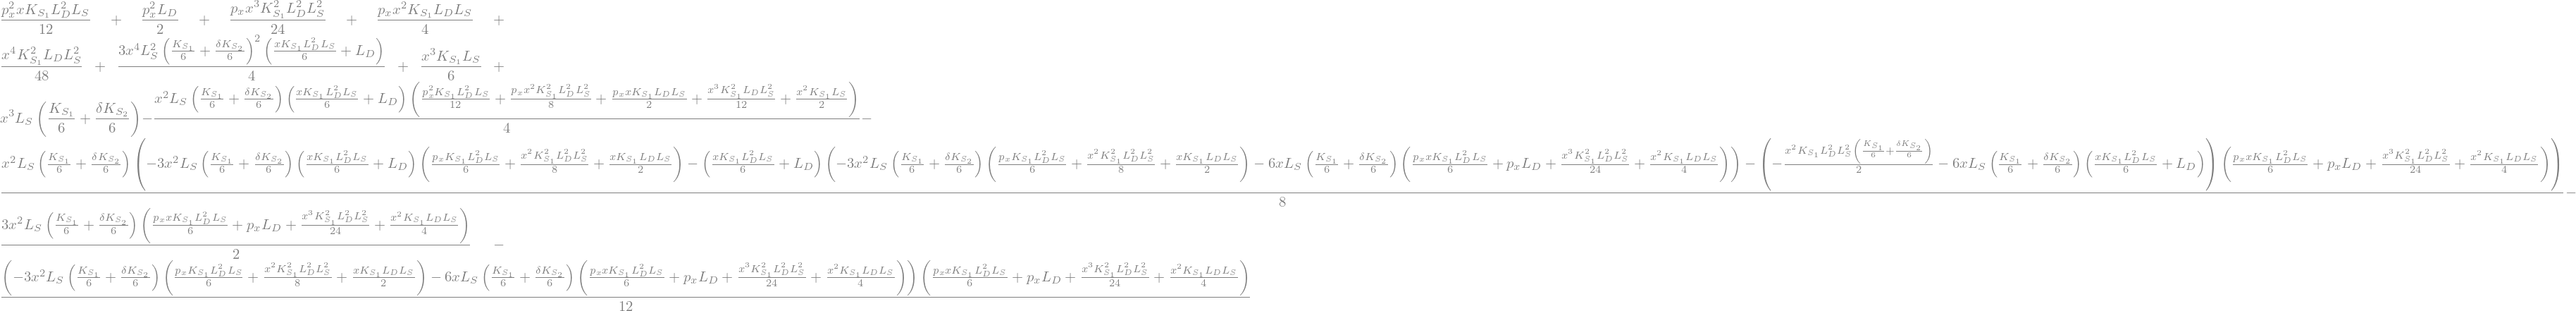

In [22]:
sdsham4

## BCH order 2

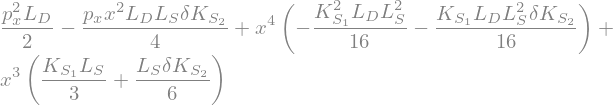

In [28]:
sdsham2.expand().collect(px*x**2).collect(x**4).collect(x**3)

# Explicit examples

## Example 1 

**Unrealistic case** ($px > 1)$. This case is meant to demonstrate the impact on the Hamiltonian surface, and not as a physcial example.

### Simple Drift Hamiltonian

In [95]:
### set some explicit values
k, lq, ld, dk  = (0.1, 1, 4.5,0.01)

# load in list to substitute in the symbolic expression
nrep = list(zip([LD,LQ,kq1,dkq1],[ld,lq,k,dk]))

# reload the coorect Hamiltonians
qdqham1 = Aop.BCH(Bop,1).BCH(Cop,1).ham.subs(A,hamq1).subs(B,hamd0).subs(C,hamq2).doit()
qdqham2 = Aop.BCH(Bop,2).BCH(Cop,2).ham.subs(A,hamq1).subs(B,hamd0).subs(C,hamq2).doit()
qdqham3 = Aop.BCH(Bop,3).BCH(Cop,3).ham.subs(A,hamq1).subs(B,hamd0).subs(C,hamq2).doit()
qdqham4 = Aop.BCH(Bop,4).BCH(Cop,4).ham.subs(A,hamq1).subs(B,hamd0).subs(C,hamq2).doit()

# create numeric functions from the symbolic ones
hoqdham1 = lambdify((x,px),qdqham1.subs(nrep),"numpy")
hoqdham2 = lambdify((x,px),qdqham2.subs(nrep),"numpy")
hoqdham3 = lambdify((x,px),qdqham3.subs(nrep),"numpy")
hoqdham4 = lambdify((x,px),qdqham4.subs(nrep),"numpy")

In [84]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


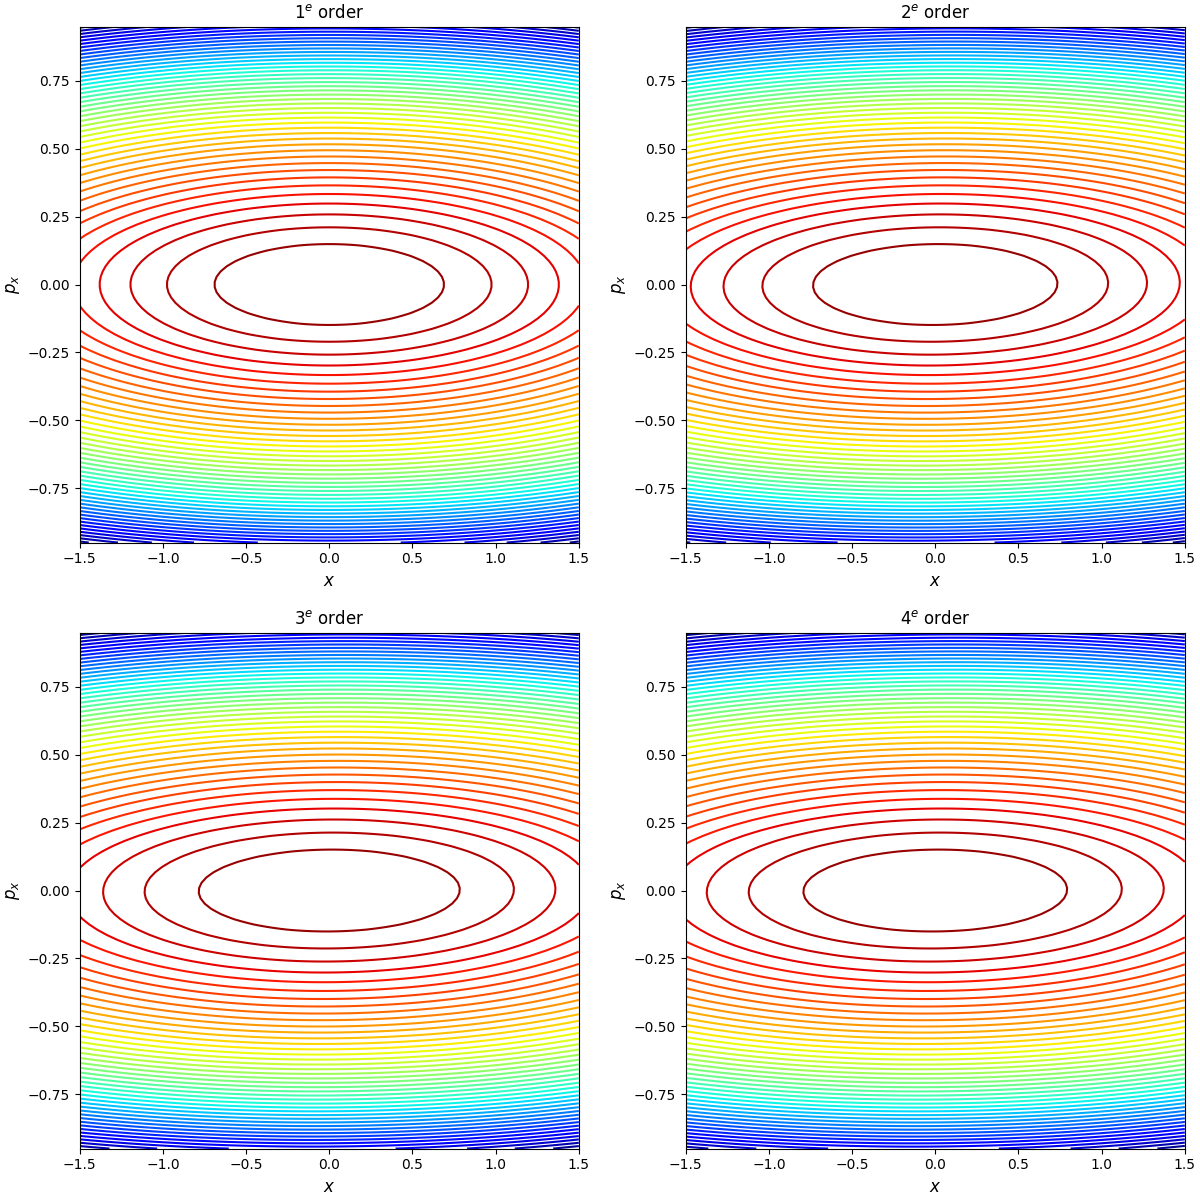

In [98]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=1.5,
    prange=0.95
)

In [99]:
for ha in [qdqham1.subs(nrep),qdqham2.subs(nrep),qdqham3.subs(nrep),qdqham4.subs(nrep)]:
    print(fixedpoints2D(ha,x,px))

{p_x: 0.0, x: 0.0}
{p_x: 0.0, x: 0.0}
{p_x: 0.0, x: 0.0}
{p_x: 0.0, x: 0.0}


### 4th order expansion root for Drift Hamiltonian

In [100]:
# reload the coorect Hamiltonians
qdqham1 = Aop.BCH(Bop,1).BCH(Cop,1).ham.subs(A,hamq1).subs(B,hamd1).subs(C,hamq2).doit()
qdqham2 = Aop.BCH(Bop,2).BCH(Cop,2).ham.subs(A,hamq1).subs(B,hamd1).subs(C,hamq2).doit()
qdqham3 = Aop.BCH(Bop,3).BCH(Cop,3).ham.subs(A,hamq1).subs(B,hamd1).subs(C,hamq2).doit()
qdqham4 = Aop.BCH(Bop,4).BCH(Cop,4).ham.subs(A,hamq1).subs(B,hamd1).subs(C,hamq2).doit()

# create numeric functions from the symbolic ones
hoqdham1 = lambdify((x,px),qdqham1.subs(nrep),"numpy")
hoqdham2 = lambdify((x,px),qdqham2.subs(nrep),"numpy")
hoqdham3 = lambdify((x,px),qdqham3.subs(nrep),"numpy")
hoqdham4 = lambdify((x,px),qdqham4.subs(nrep),"numpy")

In [85]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


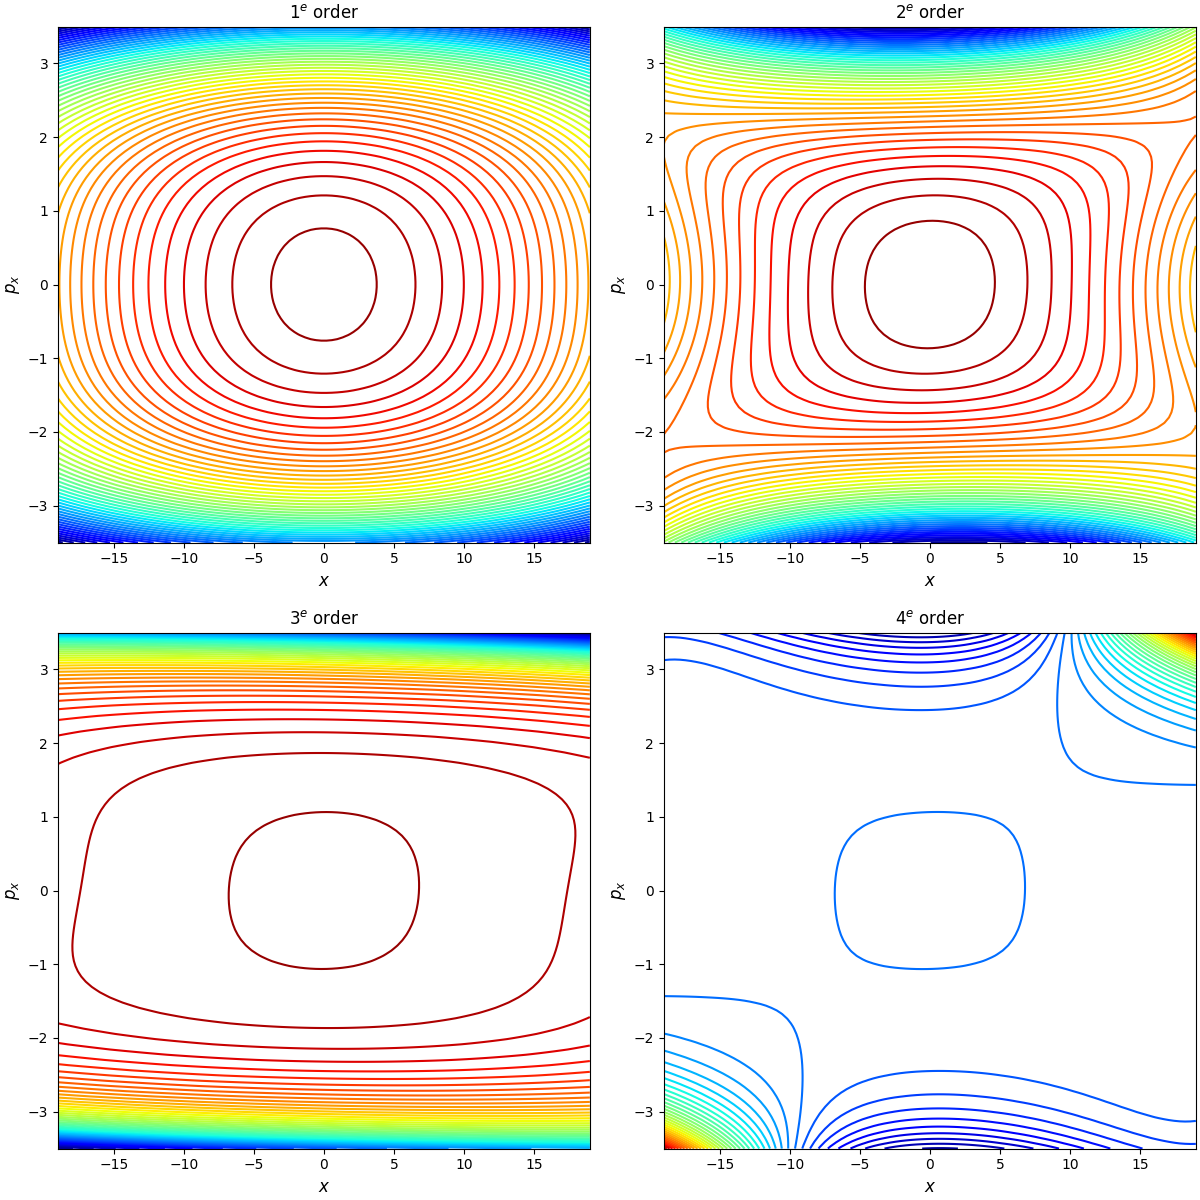

In [104]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=19,
    prange=3.5,
)


In [86]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


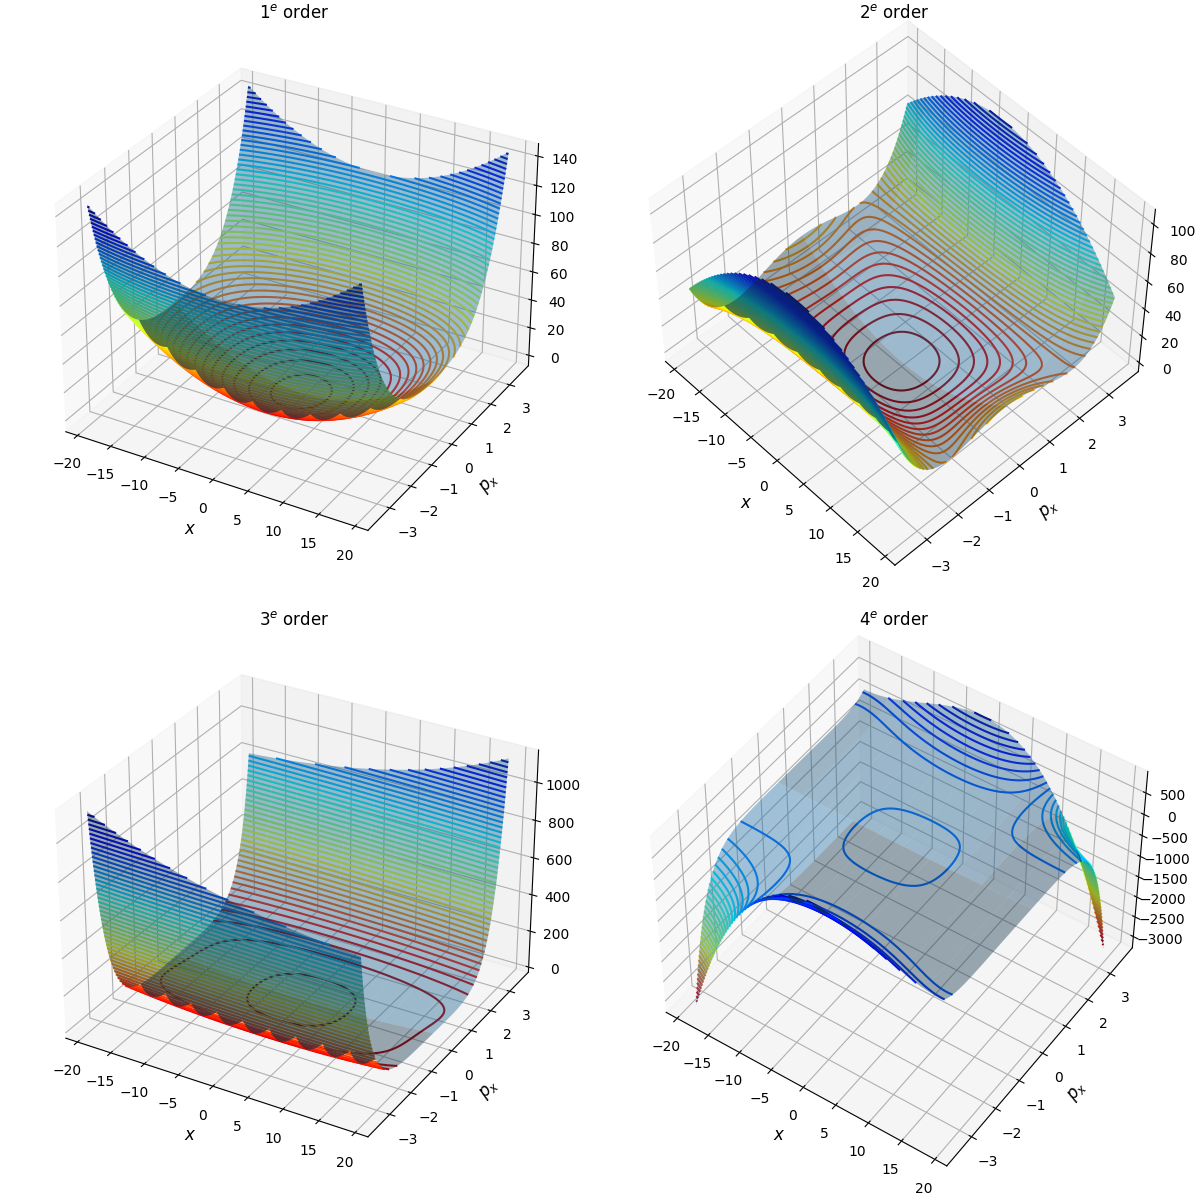

In [105]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=19,
    prange=3.5,
    d3=True
)

In [106]:
for ha in [qdqham1.subs(nrep),qdqham2.subs(nrep),qdqham3.subs(nrep),qdqham4.subs(nrep)]:
    print(fixedpoints2D(ha,x,px))

[(0.0, 0.0)]
[(-22.1155999599629, 2.28379025467341), (-19.1370805576210, -2.18095447927955), (0.0, 0.0), (19.1370805576210, 2.18095447927955), (22.1155999599629, -2.28379025467341)]
[(0.0, 0.0)]


KeyboardInterrupt: 

In [108]:
from scipy.optimize import fsolve

for ha in [qdqham2,qdqham4]:
    fxfp = lambdify((x,px),Derivative(ha.subs(nrep),x).doit(),"numpy")
    fpfp = lambdify((x,px),Derivative(ha.subs(nrep),px).doit(),"numpy")

    def func(m):
        return [fxfp(m[0],m[1]),fpfp(m[0],m[1])]

    print(fsolve(func,[15,-0.8]))

[22.11559996 -2.28379025]
[15.68099792 -1.74555546]


/home/mti/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [87]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


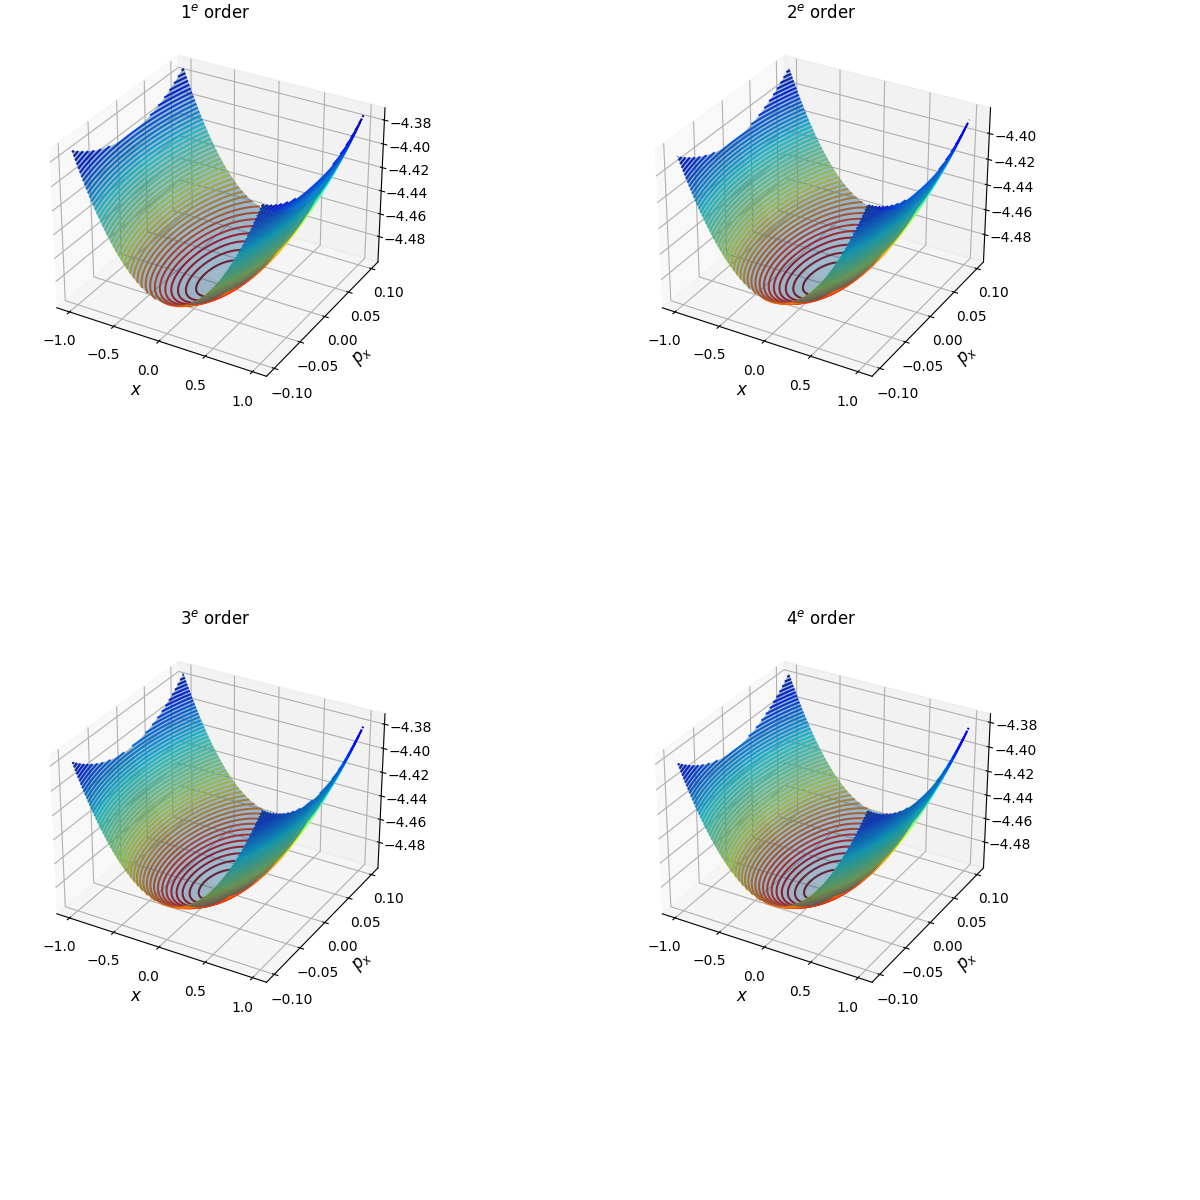

In [109]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=1,
    prange=.1,
    d3=True
)

### Full Drift Hamiltonian

In [110]:
# reload the coorect Hamiltonians
qdqham1 = Aop.BCH(Bop,1).BCH(Cop,1).ham.subs(A,hamq1).subs(B,hamdf).subs(C,hamq2).doit()
qdqham2 = Aop.BCH(Bop,2).BCH(Cop,2).ham.subs(A,hamq1).subs(B,hamdf).subs(C,hamq2).doit()
qdqham3 = Aop.BCH(Bop,3).BCH(Cop,3).ham.subs(A,hamq1).subs(B,hamdf).subs(C,hamq2).doit()
qdqham4 = Aop.BCH(Bop,4).BCH(Cop,4).ham.subs(A,hamq1).subs(B,hamdf).subs(C,hamq2).doit()

# create numeric functions from the symbolic ones
hoqdham1 = lambdify((x,px),qdqham1.subs(nrep),"numpy")
hoqdham2 = lambdify((x,px),qdqham2.subs(nrep),"numpy")
hoqdham3 = lambdify((x,px),qdqham3.subs(nrep),"numpy")
hoqdham4 = lambdify((x,px),qdqham4.subs(nrep),"numpy")

In [88]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


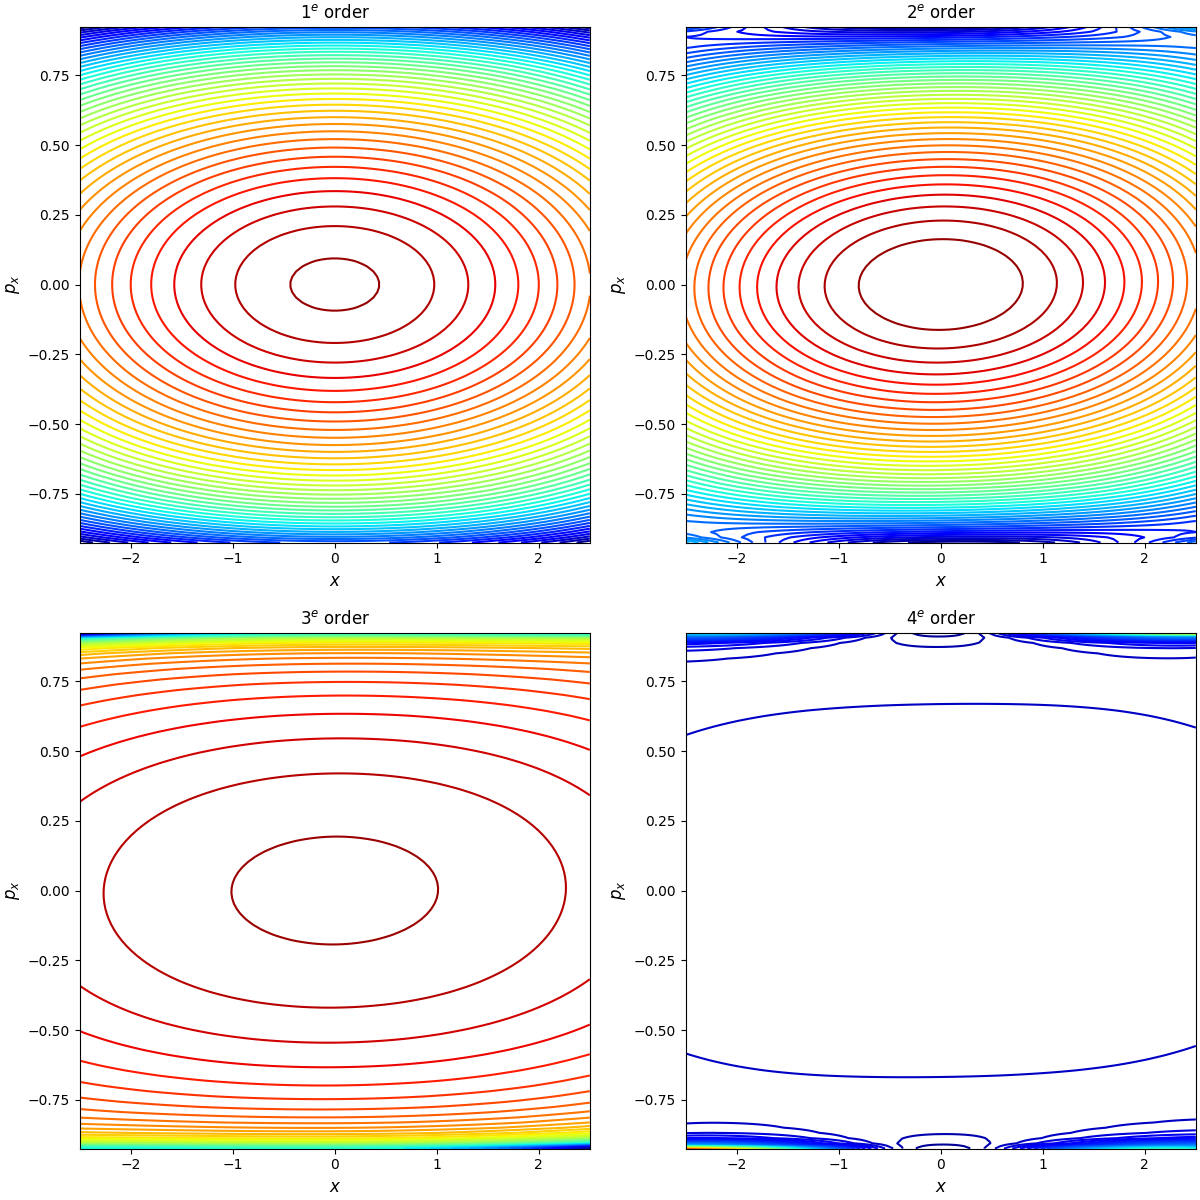

In [112]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=2.5,
    prange=0.925
)

In [114]:
# does not seem to converge
for ha in [qdqham1.subs(nrep),qdqham2.subs(nrep),qdqham3.subs(nrep),qdqham4.subs(nrep)]:
    print(fixedpoints2D(ha,x,px))

{p_x: 0.0, x: 0.0}
[]


KeyboardInterrupt: 

In [116]:
from scipy.optimize import fsolve

for ha in [qdqham2,qdqham4]:
    fxfp = lambdify((x,px),Derivative(ha.subs(nrep),x).doit(),"numpy")
    fpfp = lambdify((x,px),Derivative(ha.subs(nrep),px).doit(),"numpy")

    def func(m):
        return [fxfp(m[0],m[1]),fpfp(m[0],m[1])]

    print(fsolve(func,[4,-0.8]))

[ 2.60131822 -0.87807392]
[ 2.22167411 -0.76786391]


<span style="color:darkred">**Notice the fixed points moving inwards!!!**</span>